### This program attempts to optomize a users portfolio using the Efficient Frontier

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

plt.style.use('seaborn-v0_8-darkgrid')

In [26]:
# Get the stocks tickers in the portfolio
# This is an notebook  example to optimse the portfolio
# Lets take as example FAANG
assets = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [27]:
# Assign weights to the stocks, which should addd up to 1
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [28]:
# Get the stocks/portfolio start date
start_date = '2013-01-01'

# Get the stocks/portfolio end date
# today = datetime.today().strftime('%Y-%m-%d')
today = '2020-03-16'

In [31]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjsuted close price of the sotcks in the dataframe
for stock in assets:
    df[stock] = yf.download(stock, start=start_date, end=today)['Adj Close']
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,12.865500,16.769096,13.144286,18.013729
2013-01-03,27.770000,12.924000,16.557434,13.798571,18.024191
2013-01-04,28.760000,12.957500,16.096224,13.711429,18.380356
2013-01-07,29.420000,13.423000,16.001543,14.171429,18.300158
2013-01-08,29.059999,13.319000,16.044605,13.880000,18.264042
...,...,...,...,...,...
2020-03-09,169.500000,90.030502,64.981689,346.489990,60.778000
2020-03-10,178.190002,94.591003,69.661789,364.130005,64.019501
2020-03-11,170.240005,91.042999,67.242378,349.920013,60.770500


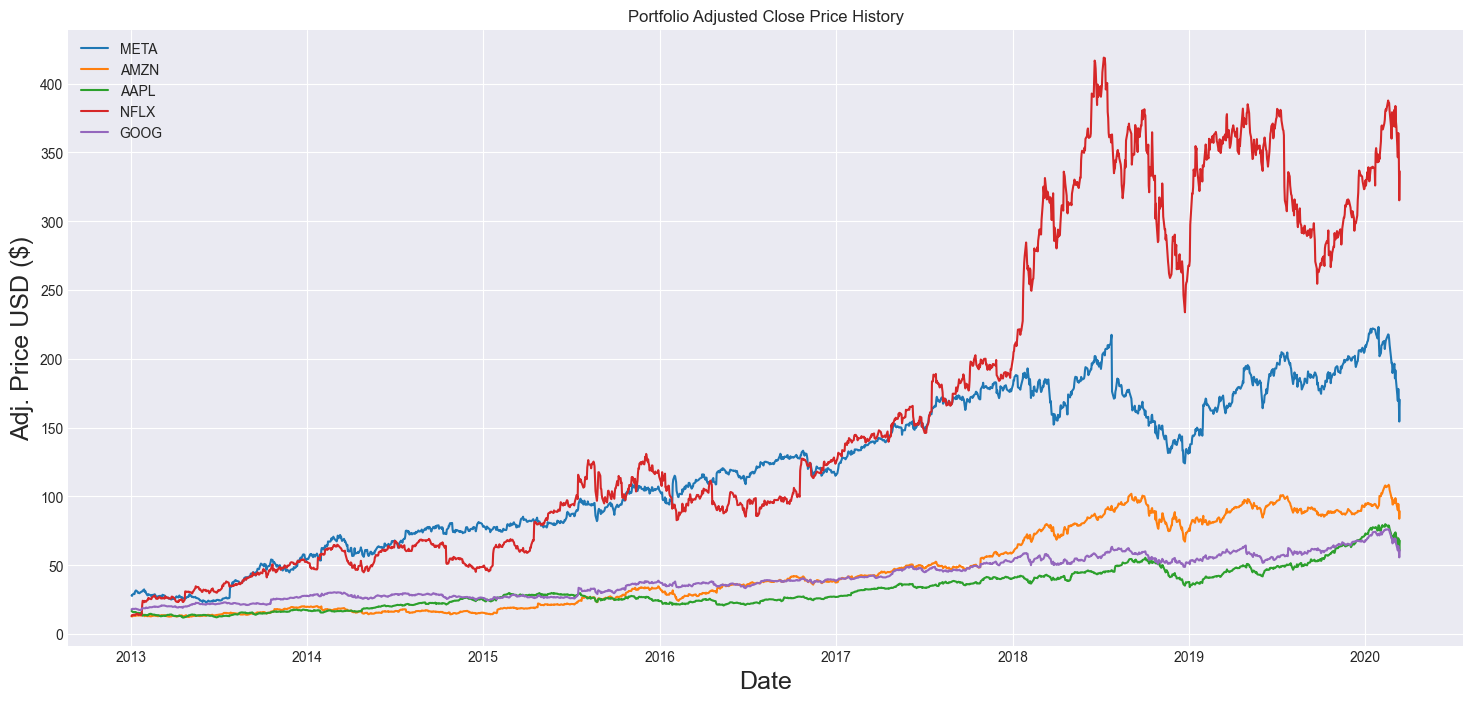

In [32]:
# Visualize the stock / portfolio
title = 'Portfolio Adjusted Close Price History'

plt.figure(figsize=(18, 8))

for stock in df.columns.values:
    plt.plot(df[stock], label=stock)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(df.columns.values, loc='upper left')
plt.show()


In [33]:
# Show daily simple return

returns = df.pct_change()
returns

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-03-09,-0.064001,-0.052854,-0.079092,-0.060926,-0.063809
2020-03-10,0.051268,0.050655,0.072022,0.050911,0.053333
2020-03-11,-0.044615,-0.037509,-0.034731,-0.039025,-0.050750


In [35]:
# Create and show the annualized covariance matrix
# Covariance matrix: Mathematical concept used in Statistics, which determines how much two random variables move together. It is the directional relationship between two assets prices.
# 252 -> nr of trading days in that year.

cov_matrix_annual = returns.cov() * 252 
cov_matrix_annual

,META,AMZN,AAPL,NFLX,GOOG
META,0.109611,0.048688,0.033886,0.050926,0.041998
AMZN,0.048688,0.089034,0.031999,0.057688,0.043506
AAPL,0.033886,0.031999,0.069938,0.028193,0.030822
NFLX,0.050926,0.057688,0.028193,0.211284,0.045765
GOOG,0.041998,0.043506,0.030822,0.045765,0.058966


The diagonal line shows the variance of the different assets.
All the other entries are called the covariance.

If we take the square root of variance we get the volatility


In [36]:
# Calculate portfolio variance

portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
portfolio_variance

0.05463088665995128

In [37]:
# Calculate portfolio volatility aka std. deviation

portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

0.2337325109178252

In [38]:
# Calculate portfolio annual return

portfolio_simple_annual_return = np.sum(returns.mean() * weights) * 252
portfolio_simple_annual_return

0.32018505462348645

In [39]:
# show the expected annual return, volatility (risk), and variance

percent_var = str(round(portfolio_variance, 2) * 100) + '%'
percent_vol = str(round(portfolio_volatility, 2) * 100) + '%'
percent_return = str(round(portfolio_simple_annual_return, 2) * 100) + '%'

print(f"Expected annual return: {percent_return}")
print(f"Annual Volatility/risk: {percent_vol}")
print(f"Annual Variance: {percent_var}")

Expected annual return: 32.0%
Annual Volatility/risk: 23.0%
Annual Variance: 5.0%


### 

### Portfolio Optimization !
- I want to increase Expected annual return, and reducing my risk.

In [40]:
# Calculate the expected returns and the annualised sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimise for maximum sharpe ratio: 
# Sharp ratio is a way to describe how much excess return you receive for some amount of volatility.
# Measures the performance of an investment compared to a risk-free investment (bonds or Treasury bills)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

# Helper methods to clean raw methods it sets. Whose absolute value are below some cutoff (defaulted on the method)
# It is going to get rid of the stocks we dont need to optimise the portfolio
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

ef.portfolio_performance(verbose=True)

OrderedDict([('META', 0.12352), ('AMZN', 0.24963), ('AAPL', 0.22865), ('NFLX', 0.39821), ('GOOG', 0.0)])
Expected annual return: 38.9%
Annual volatility: 27.3%
Sharpe Ratio: 1.35


(0.3885974031237044, 0.2730588892846386, 1.3498824524239375)

Doesn't look better, it depends on the year

In [42]:
# Get discrete allocation of each share per stock

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15_000)

allocation, leftover = da.lp_portfolio()

print(f'Discrete allocation (shares): {allocation}')
print(f'Funds remaining: ${leftover:.2f}')

Discrete allocation (shares): {'AMZN': 45, 'AAPL': 56, 'NFLX': 19, 'GOOG': 11}
Funds remaining: $122.90


OrderedDict([('META', 0.12352),
             ('AMZN', 0.24963),
             ('AAPL', 0.22865),
             ('NFLX', 0.39821),
             ('GOOG', 0.0)])